In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from datetime import datetime
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [2]:
dffilm = pd.read_csv(Path('./Resources/train.csv'))

In [3]:
dffilm.drop(['belongs_to_collection','budget','genres','homepage',
            'imdb_id','spoken_languages','overview','title','poster_path','production_companies',
            'production_countries','original_title','tagline','Keywords','cast','crew'], axis=1, inplace=True)
dffilm.head()

,id,original_language,popularity,release_date,runtime,status,revenue
0,391,it,3.800073,12/22/12,0.0,Released,10703234
1,592,ru,0.402368,12/4/03,0.0,Released,234748
2,925,es,1.926826,11/15/13,0.0,Released,850259
3,978,it,5.010563,10/27/11,0.0,Released,12935800
4,1256,it,1.623440,8/25/75,0.0,Released,39598448


In [4]:
#plt.scatter(dffilm.original_language,dffilm.revenue)
dffilm.revenue

0        10703234
1          234748
2          850259
3        12935800
4        39598448
          ...    
2995    122700000
2996     71000000
2997       871279
2998        31000
2999        65335
Name: revenue, Length: 3000, dtype: int64

In [5]:
X_releasedate =dffilm
for m in range(0,len(dffilm.release_date)):
    film_date = dffilm.release_date[m]
    dt = datetime.strptime(film_date, '%m/%d/%y')
    #dffilm.release_date[m] = datetime_object.timetuple().tm_yday
    X_releasedate.release_date[m]= dt.month
    
for i in range(0,len(dffilm.original_language)):
    if dffilm.original_language[i]== 'en':
        X_releasedate.original_language[i] = 1
    else:
        X_releasedate.original_language[i] = 0
        

for j in range(0,len(dffilm.status)):
    if dffilm.status[j]== 'Released':
        X_releasedate.status[j] = 1
    else:
        X_releasedate.status[j] = 0        
        

X_releasedate =X_releasedate[X_releasedate['runtime'] !=0]
X_releasedate =X_releasedate[X_releasedate['revenue'] !=0]
X_releasedate

/var/folders/23/mc3swhfd7ts230fqc9_j4xqw0000gn/T/ipykernel_9102/3183302430.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_releasedate.release_date[m]= dt.month
/var/folders/23/mc3swhfd7ts230fqc9_j4xqw0000gn/T/ipykernel_9102/3183302430.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_releasedate.original_language[i] = 0
/var/folders/23/mc3swhfd7ts230fqc9_j4xqw0000gn/T/ipykernel_9102/3183302430.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

,id,original_language,popularity,release_date,runtime,status,revenue
12,2578,1,0.209191,6,11.0,1,97
13,776,1,2.923870,4,40.0,1,7732325
14,1021,1,1.081517,2,40.0,1,87600000
15,225,1,0.410738,5,53.0,1,500
16,1008,1,0.007877,2,60.0,0,60
...,...,...,...,...,...,...,...
2995,524,1,11.147040,10,220.0,1,122700000
2996,1923,1,8.591238,6,248.0,1,71000000
2997,1212,1,4.558075,5,338.0,1,871279
2998,1336,0,0.292296,10,NaN,1,31000


In [7]:
X_releasedate['release_date']=X_releasedate.release_date.astype('int64')
X_releasedate['original_language']=X_releasedate.original_language.astype('int64')
X_releasedate['status']=X_releasedate.status.astype('int64')

In [8]:
X = X_releasedate.dropna().copy()


In [9]:

X=X_releasedate.dropna()
y=X_releasedate.dropna()
#X.drop(['id','popularity','release_date','runtime','original_language','revenue'], axis=1, inplace=True)
#y.drop(['id','popularity','release_date','runtime','status','original_language'], axis=1, inplace=True)
X.shape
y.shape
X

,id,original_language,popularity,release_date,runtime,status,revenue
12,2578,1,0.209191,6,11.0,1,97
13,776,1,2.923870,4,40.0,1,7732325
14,1021,1,1.081517,2,40.0,1,87600000
15,225,1,0.410738,5,53.0,1,500
16,1008,1,0.007877,2,60.0,0,60
...,...,...,...,...,...,...,...
2993,1915,1,5.374563,2,214.0,1,12923936
2994,1303,1,4.393576,11,219.0,1,3484331
2995,524,1,11.147040,10,220.0,1,122700000
2996,1923,1,8.591238,6,248.0,1,71000000


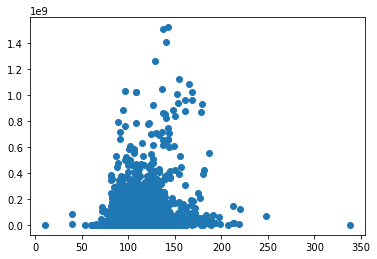

In [13]:
plt.scatter(X.runtime,y.revenue)
#plt.scatter(X,y)

In [14]:
#X = X_releasedate.reshape(-1, 1)
#X[:5]

In [15]:
X.shape

(2986, 7)

In [16]:
y.shape

(2986, 7)

In [17]:
model = LinearRegression()
model


# Fit the data into the model
model.fit(X, y)

LinearRegression()

In [18]:
# The slope
print(model.coef_)

[[ 1.00000000e+00 -2.25455800e-15  2.49284410e-17 -4.96918307e-17
   1.03779633e-16  3.12171649e-16  7.43706113e-19]
 [-1.23286530e-13  1.00000000e+00 -3.74832629e-10 -1.41769179e-10
   7.43146102e-11  5.02985956e-10 -1.11018423e-16]
 [ 8.15557611e-19 -9.79542628e-14  1.00000000e+00  3.90440466e-16
  -3.90106871e-17  9.94671960e-16 -6.65984552e-22]
 [ 9.76510024e-19  6.13908850e-14  8.64898295e-17  1.00000000e+00
   4.18186668e-17 -2.32602824e-16  1.19372243e-22]
 [ 3.90262049e-17  3.99317310e-13  1.11504228e-15 -3.98261978e-16
   1.00000000e+00 -1.20753686e-13  2.52405493e-22]
 [ 4.52480725e-21  6.62731165e-16 -1.50043335e-18 -1.05024351e-18
  -9.28585970e-19  1.00000000e+00  3.43528566e-24]
 [ 8.02779710e-13  1.94838787e-07  1.74526205e-09  1.19855183e-10
   5.99343248e-10 -1.53291447e-09  1.00000000e+00]]


In [19]:
# The y-intercept
print(model.intercept_)

[-4.95674612e-11  3.10823156e-09  1.27897692e-13 -7.19424520e-14
 -3.12638804e-13  3.33066907e-16 -2.68220901e-07]


In [20]:
# The model creates predicted y values based on X values
predicted_y_values = model.predict(X)
print(X)

        id  original_language  popularity  release_date  runtime  status  \
12    2578                  1    0.209191             6     11.0       1   
13     776                  1    2.923870             4     40.0       1   
14    1021                  1    1.081517             2     40.0       1   
15     225                  1    0.410738             5     53.0       1   
16    1008                  1    0.007877             2     60.0       0   
...    ...                ...         ...           ...      ...     ...   
2993  1915                  1    5.374563             2    214.0       1   
2994  1303                  1    4.393576            11    219.0       1   
2995   524                  1   11.147040            10    220.0       1   
2996  1923                  1    8.591238             6    248.0       1   
2997  1212                  1    4.558075             5    338.0       1   

        revenue  
12           97  
13      7732325  
14     87600000  
15          500

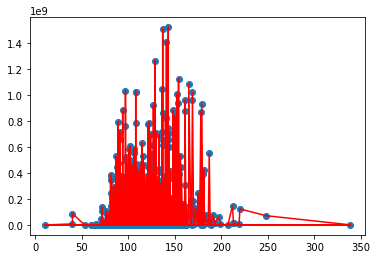

In [24]:
#Plot the results. The best fit line is red.
plt.scatter(X.runtime, y.revenue)
plt.plot(X.runtime,predicted_y_values,color='red')

In [22]:
X=y.drop('revenue',axis=1).copy()
# Splitting into Train and Test sets
#X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=1, stratify=y)
#X_train,X_test,y_train,y_test = train_test_split(X, y,random_state=78)

In [11]:
X_test
y_train
y_test

X_train



,id,original_language,popularity,release_date,runtime,status
2629,2630,1,14.657754,3,89.0,1
850,851,1,9.424157,9,121.0,1
1171,1172,1,13.371056,4,92.0,1
1529,1530,1,1.650666,5,111.0,1
830,831,1,2.447359,12,139.0,1
...,...,...,...,...,...,...
2154,2155,0,0.878255,9,99.0,1
40,41,1,2.941626,4,118.0,1
1944,1945,1,7.798615,3,108.0,1
470,471,1,0.079856,9,120.0,1


In [22]:
dffilm['runtime'].describe()

count    2998.000000
mean      107.856571
std        22.086434
min         0.000000
25%        94.000000
50%       104.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64